In [47]:
import os

train_folder = 'D:\\Datasets\\g2net-detecting-continuous-gravitational-waves (1)\\train'
test_folder = 'D:\\Datasets\\g2net-detecting-continuous-gravitational-waves (1)\\test'

# List of names of all files in the folder
train_files = os.listdir(train_folder)
print(train_files)
test_files = os.listdir(test_folder)

['001121a05.hdf5', '004f23b2d.hdf5', '00a6db666.hdf5', '00f36a6ac.hdf5', '010a387db.hdf5', '0197bacf8.hdf5', '01b8b67f3.hdf5', '01bcf6533.hdf5', '01dba9731.hdf5', '021248995.hdf5', '02887d232.hdf5', '029ed046c.hdf5', '02c478b09.hdf5', '02c8f43f3.hdf5', '03189bb3d.hdf5', '0367dc82c.hdf5', '04673609a.hdf5', '047e6e2a3.hdf5', '0517ef7fe.hdf5', '05c0675fe.hdf5', '05cdc0769.hdf5', '05f0aef12.hdf5', '067b3fb4b.hdf5', '06e321c6e.hdf5', '07b326ea1.hdf5', '08a060dad.hdf5', '08c444d66.hdf5', '09134f1c2.hdf5', '0920a4276.hdf5', '09531cde3.hdf5', '097370861.hdf5', '09e55aeba.hdf5', '09ecddbba.hdf5', '0ba188c57.hdf5', '0bc8216f2.hdf5', '0c102ab5a.hdf5', '0c30b3fef.hdf5', '0c55d030c.hdf5', '0d0ad0b19.hdf5', '0dc4c8ed0.hdf5', '0e39a18bf.hdf5', '0e60d4893.hdf5', '0e66d0460.hdf5', '0eb30f7c4.hdf5', '0ebe28dd5.hdf5', '0ee090299.hdf5', '0f53d8b96.hdf5', '10dfa2ed6.hdf5', '10eaa1cb2.hdf5', '113ef0cbc.hdf5', '1185806d8.hdf5', '119610501.hdf5', '123594dc7.hdf5', '1282f6c1f.hdf5', '12f0fd6fd.hdf5', '12f9824f

In [2]:
import h5py as h5

# A representation of what an HDF5 file looks like from the inside.

with h5.File(train_folder + '\\' + train_files[0], 'r') as f:
    for file_key in f.keys():
        group = f[file_key]
        print(group)
        try:
            for group_key in group.keys():
                group2 = group[group_key]
                print(f"---->{group2}")
                for group_key2 in group2.keys():
                    print(f"--------->{group2[group_key2]}")
        except AttributeError:
            pass

<HDF5 group "/001121a05" (3 members)>
----><HDF5 group "/001121a05/H1" (2 members)>
---------><HDF5 dataset "SFTs": shape (360, 4612), type "<c8">
---------><HDF5 dataset "timestamps_GPS": shape (4612,), type "<i8">
----><HDF5 group "/001121a05/L1" (2 members)>
---------><HDF5 dataset "SFTs": shape (360, 4653), type "<c8">
---------><HDF5 dataset "timestamps_GPS": shape (4653,), type "<i8">
----><HDF5 dataset "frequency_Hz": shape (360,), type "<f8">


C:\Users\noudy\DataSpellProjects\Gravitational\DS_venv\lib\site-packages\scipy\signal\spectral.py:1816: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
C:\Users\noudy\DataSpellProjects\Gravitational\DS_venv\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log10
C:\Users\noudy\DataSpellProjects\Gravitational\DS_venv\lib\site-packages\ipykernel_launcher.py:29: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.


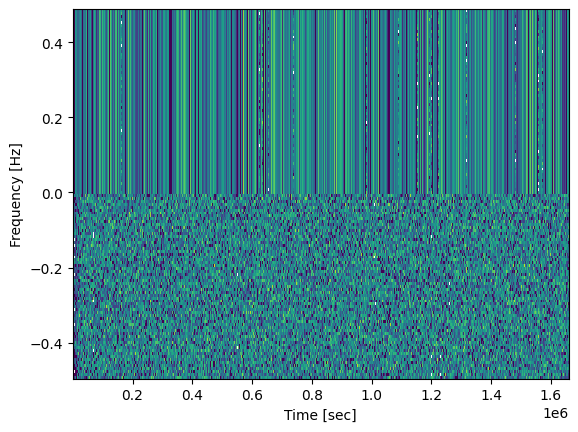

<Figure size 640x480 with 0 Axes>

In [62]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt


# Open the HDF5 file
with h5.File(train_folder + '\\' + train_files[0], 'r') as f:

    H1_group = f['/001121a05/H1']

    H1_SFTs = H1_group['SFTs']
    H1_SFTs = np.array(H1_SFTs)
    H1_SFTs = H1_SFTs.reshape(-1)

    H1_timestamps_GPS = H1_group['timestamps_GPS']

    # Extract the SFTs and timestamps data from the HDF5 file (as shown above)

    # Divide the SFTs data into segments
    nperseg = 128
    overlap = nperseg // 2
    f, t, Sxx = signal.spectrogram(H1_SFTs, fs=1, window='hann', nperseg=nperseg, noverlap=overlap)

    # Reshape the spectrogram data to match the dimensions of t and f
    Sxx = Sxx.reshape(t.shape[0], f.shape[0])
    Sxx = Sxx.transpose()

    # Plot the spectrogram
    plt.pcolormesh(t, f, np.log10(Sxx))
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()
    # Save the spectrogram figure as a PNG file
    plt.savefig('spectrogram.png')
